# Projet 4 : Réalisez une étude de santé publique avec R ou Python

   **Remarque** : Afin de faciliter la lecture des différentes requêtes, j'ai choisi de nommer mes dataframes en prenant comme réference le nom du responsable et le numéro de la requête. 


**Exemple :**
 * Pour la première requête de Marc, la référence sera : ma1_sous_nutrition / ma1_population...          
 * Pour la deuxième requête de Mélanie, la référence sera : me2_sous_nutrition / me2_population...*

### Sommaire

* [Requêtes de Marc](#chapter1)
    * [la proportion de personnes en état de sous-nutrition en 2017 ](#section_1_1)
    * [Le nombre théorique de personnes qui pourraient être nourries en 2017](#section_1_2)
    * [le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire des produits végétaux en 2017](#section_1_3)
    * [L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.](#section_1_4)
* [Requêtes de Mélanie](#chapter2)
    * [les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017](#section_2_1)
    * [les pays qui ont le plus bénéficié d’aide depuis 2013](#section_2_2)
    * [Les pays ayant le plus/le moins de disponibilité/habitant](#section_2_3)
* [Pistes supplémentaires de recherches](#chapter3)
    * [Répartition des céréales entre l'alimentation humaine et animale](#section_3_1)
    * [Comparaison de la répartition des céréales entre l'alimentation humaine et animale en fonction des pays ayant le plus de disponibilité alimentaire et ceux qui en ont le moins](#section_3_2)
    * [La Thaïlande et l'utilisation du manioc](#section_3_3)

Cette étude repose sur des fichier de types ".csv" téléchargés sur le site de la "Food and Agriculture Organization of the United Nations (FAO)" : 


    * dispo_alimentaire.csv
    * sous_nutrition.csv
    * population.csv
    * aide_alimentaire.csv

## Requêtes de Marc <a class="anchor" id="chapter1"></a>

### La proportion de personnes en état de sous-nutrition en 2017 <a class="anchor" id="section_1_1"></a>

Formule : 
                **(Nombre total de personnes en sous-nutrition / Population mondiale) *100**

Pour cela je dois :
* Ouvrir la librairie Pandas
* Importer les fichiers **'population.csv'** et **'sous_nutrition.csv'** 
* Vérifier l'ensemble des données afin de traiter les valeurs nulles et les caractères spéciaux sur les colonnes de type *int* ou *float*
* Filtrer et ne conserver que les données de l'année **2017** ( représentée par : **'2016-2018'** sur le fichier **'sous_nutrition.csv'** et par **'2017'** dans le fichier **'population.csv'**).
* Faire une jointure entre **'sous_nutrition.csv'** et **'population.csv'** en prenant 'Zone' comme clé.  
* Calculer la proportion
    

In [1]:
import pandas as pd
ma1_sous_nutrition = pd.read_csv('sous_nutrition.csv')
ma1_population = pd.read_csv('population.csv')

In [2]:
# Aperçu de la dataframe
ma1_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [3]:
#Afficher le type des colonnes
ma1_sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [4]:
#Afficher le nombre de lignes et de colonnes
ma1_sous_nutrition.shape

(1218, 3)

In [5]:
# Recherche des valeurs 'nan' et caractères spéciaux

ma1_sous_nutrition['Valeur'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [6]:
# Remplacement des caractères spéciaux '<0.1' par 0

ma1_sous_nutrition.loc[ma1_sous_nutrition['Valeur'] == '<0.1'] = 0

In [7]:
# Remplacement des valeurs 'nan' par 0

ma1_sous_nutrition.fillna(0,inplace=True)

In [8]:
# Vérification des dataframes avant la jointure 

ma1_population.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [9]:
ma1_sous_nutrition.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [10]:
# Jointure des dataframes sur la colonne 'Zone' et restriction sur la colonne 'Année'

ma1_sous_nutrition = pd.merge(ma1_sous_nutrition.loc[ma1_sous_nutrition['Année']=='2016-2018',['Valeur', 'Zone']],
                             ma1_population.loc[ma1_population['Année']==2017,['Valeur','Zone']], on='Zone')

In [11]:
# Affiche les informations globales de la dataframe
ma1_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Valeur_x  183 non-null    object 
 1   Zone      183 non-null    object 
 2   Valeur_y  183 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.7+ KB


In [12]:
# Je renomme mes colonnes pour plus de lisibilité

ma1_sous_nutrition.rename(columns= {'Valeur_x':'Personne sous-nutrition', 'Valeur_y': 'Population'}, inplace= True) 

In [13]:
ma1_sous_nutrition.head()

,Personne sous-nutrition,Zone,Population
0,10.5,Afghanistan,36296.113
1,3.1,Afrique du Sud,57009.756
2,0.1,Albanie,2884.169
3,1.3,Algérie,41389.189
4,0,Allemagne,82658.409


In [14]:
# Calcul de la population mondiale avec mise à l'échelle de la colonne 

population_mondiale = (ma1_sous_nutrition['Population'].sum())*1000

In [15]:
print("La population mondiale compte {:,.0f} habitants.".format(population_mondiale).replace(',', ' '))

La population mondiale compte 7 528 921 162 habitants.


In [16]:
# Modification du type de la colonne 'Personne sous_nutrition de 'object' à 'float64' pour effectuer mes calculs

ma1_sous_nutrition['Personne sous-nutrition'] = ma1_sous_nutrition['Personne sous-nutrition'].astype("float64")

In [17]:
# Calcul du nombre total de personnes en sous-nutrition avec changement de l'échelle de la colonne 'Personne sous-nutrition'

personne_sous_nutrition = ma1_sous_nutrition['Personne sous-nutrition'].sum()*1000000

In [18]:
print("Il y a {:,.0f} personnes en état de sous-nutrition dans le monde.".format(personne_sous_nutrition).replace(',', ' '))

Il y a 535 700 000 personnes en état de sous-nutrition dans le monde.


In [19]:
# Calcul de la proportion de personnes en sous-nutrition

proportion = (personne_sous_nutrition / population_mondiale )*100

In [20]:
print("En 2017 : {:,.3f} % de la population mondiale est en état de sous-nutrition.".format(proportion).replace(',', ' '))

En 2017 : 7.115 % de la population mondiale est en état de sous-nutrition.


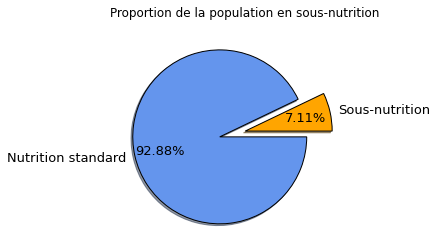

In [21]:
# Création du graphique

# Importation du module pyplot de la librairie matplotlib
import matplotlib.pyplot as plt 

# création d'une liste comme arguments pour le graphique
portion = [7.115, 92.885] 
# Paramétrage du graphique
plt.pie(portion,labels=['Sous-nutrition', 'Nutrition standard'],colors = ['orange','cornflowerblue'],autopct='%.2f%%',pctdistance=0.71,shadow=True, startangle=360,wedgeprops={'linewidth': 1.0,'edgecolor':'black'},explode=(0, 0.3),textprops={'fontsize': 13})
# Ajout du titre
plt.title('Proportion de la population en sous-nutrition')
# Affichage
plt.show()

### Le nombre théorique de personnes qui pourraient être nourries en 2017 <a class="anchor" id="section_1_2"></a>

La formule de cette requête est : **(Total de la disposition alimentaire(Kcal)/2500/365**)  
*(2500 Kcal comme valeur quotidienne recommandée et 365 jours pour obtenir la disponibilité par jour)*

Afin de traiter cette requête j'ai choisi comme valeur énergétique quotidienne standard :
* 2500 Kcalories 
* 10 grammes de protéines animal 


Pour cela je dois :

* Importer les fichiers **'population.csv'** et **'dispo_alimentaire.csv'**
* Trier mes colonnes et les regrouper
* Filtrer sur l'année '2017'
* Faire une jointure entre les deux fichiers sur la colonne 'Zone'
* Calculer la disponibilité alimentaire totale


In [22]:
# Ouverture des fichiers csv
ma2_population = pd.read_csv('population.csv')
ma2_dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

In [23]:
ma2_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [24]:
ma2_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [25]:
# Sélection des colonnes

ma2_dispo_alimentaire = ma2_dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)',
                           'Disponibilité alimentaire en quantité (kg/personne/an)',
                           'Disponibilité de matière grasse en quantité (g/personne/jour)',
                           'Disponibilité de protéines en quantité (g/personne/jour)',
                           'Disponibilité intérieure','Exportations - Quantité','Importations - Quantité']]


In [26]:
# Regroupement des données sur la colonne 'Zone' en affichant que les valeurs des colonnes disponibilité alimentaire

ma2_dispo_alimentaire = ma2_dispo_alimentaire.groupby('Zone').sum()[['Disponibilité alimentaire (Kcal/personne/jour)',
                                     'Disponibilité alimentaire en quantité (kg/personne/an)']]

In [27]:
# Restriction de la colonne 'Année' sur l'année 2017.

ma2_population = ma2_population.loc[ma2_population['Année']==2017,:]

In [28]:
# Jointure des dataframes avec comme clé la colonne 'Zone' par la gauche pour conserver les données de ma dataframe ma2_population
# et ajouter les données complémentaires de la datframe ma2_dispo_alimentaire

ma2_population = pd.merge( ma2_population,ma2_dispo_alimentaire, on = "Zone", how="left")

In [29]:
ma2_population.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)
0,Afghanistan,2017,36296.113,2087.0,351.41
1,Afrique du Sud,2017,57009.756,3020.0,564.80
2,Albanie,2017,2884.169,3188.0,1095.54
3,Algérie,2017,41389.189,3293.0,809.13
4,Allemagne,2017,82658.409,3503.0,957.52


In [30]:
# Calcul de la disponibilité alimentaire (Kcal) totale avec mise à l'échelle de la colonne 'Valeur'

ma2_total_dispo_kal = ((ma2_population['Valeur']*1000) * (ma2_population['Disponibilité alimentaire (Kcal/personne/jour)'])).sum()

In [31]:
print("La quantité de disponibilité alimentaire est de : {:,.2f} Kcal".format(ma2_total_dispo_kal).replace(',', ' '))

La quantité de disponibilité alimentaire est de : 20 918 984 627 331.00 Kcal


In [32]:
# Calcul du nombre de personnes pouvant être nourris avec la disponibilité alimentaire 

ma2_total_nourri = ma2_total_dispo_kal/2500

In [33]:
print("Le nombre théorique de personnes qui pourraient être nourries en 2017 est: {:,.2f} personnes.".format(ma2_total_nourri).replace(',', ' '))

Le nombre théorique de personnes qui pourraient être nourries en 2017 est: 8 367 593 850.93 personnes.


In [34]:
# Calcul de la population mondiale
ma2_total_population = (ma2_population['Valeur']*1000).sum()

In [35]:
print("La population totale en 2017 est: {:,.2f} personnes.".format(ma2_total_population).replace(',', ' '))

La population totale en 2017 est: 7 548 134 111.00 personnes.


In [36]:
# Calcul de la proportion de personnes pouvant être nourries
ma2_proportion = ((ma2_total_nourri/ma2_total_population)*100).sum()

In [37]:
print("La proportion de personnes pouvant être nourries avec la disponibilité alimentaire (Kcal) totale est de : {:,.2f} %".format(ma2_proportion).replace(',', ' '))

La proportion de personnes pouvant être nourries avec la disponibilité alimentaire (Kcal) totale est de : 110.86 %


(array([0.e+00, 1.e+09, 2.e+09, 3.e+09, 4.e+09, 5.e+09, 6.e+09, 7.e+09,
        8.e+09, 9.e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

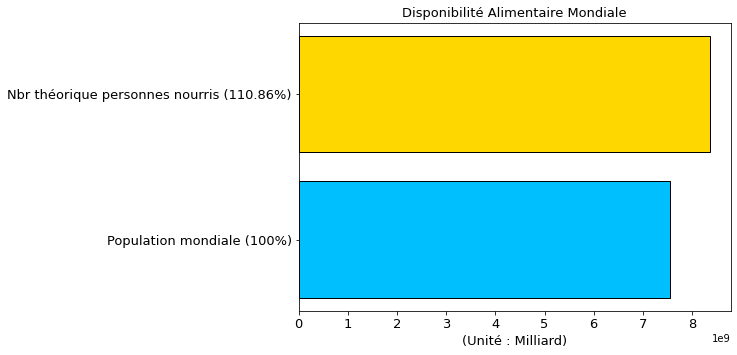

In [38]:
# Création d'un graphique à barres 
import matplotlib.pyplot as plt
# création de la figure
fig = plt.figure ()
# Ajout des axes
ax = fig.add_axes([0.3,0.6,1,1])
# Création des listes de données
population_x = ['Population mondiale (100%)','Nbr théorique personnes nourris (110.86%)']
chiffres_y = [7548134111.00,8367593850.93]
# Paramétrage du graphique à barres
plt.barh(population_x,chiffres_y,color = ('deepskyblue','gold'),edgecolor='black')
# Création du titre 
plt.title('Disponibilité Alimentaire Mondiale', fontsize= 13)
# Création d'un titre sur l'axe x 
plt.xlabel('(Unité : Milliard)', fontsize=13, color='black') 
# Paramétrage de la taille et de la couleur des axes x et y
plt.yticks(fontsize=13, color='black')
plt.xticks(fontsize=13, color='black')




### Le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire des produits végétaux en 2017 <a class="anchor" id="section_1_3"></a>

La formule reste la même sauf que l'on ne conserve que la disponibilité alimentaire végétale :  

**(Total de la disposition alimentaire vegetale(Kcal)/2500/365**)  

*(2500 pour la valeur quotidienne recommandée et 365 pour obtenir la disponibilité par jour)*

Pour cela je dois :

* Importer les fichiers 'population.csv' et 'dispo_alimentaire.csv'
* Trier mes colonnes et les regrouper
* Faire un .loc sur la colonne "Origine" afin de ne conserver que les données d'origine végétale
* Filtrer sur l'année '2017'
* Faire une jointure entre les deux fichiers sur la colonne 'Zone'
* Appliquer ma formule

In [39]:
# Ouverture des fichiers
ma3_dispo = pd.read_csv('dispo_alimentaire.csv')
ma3_popu = pd.read_csv('population.csv')

In [40]:
# Restriction sur les colonnes afin de ne conserver que celles dont nous avons besoin
ma3_dispo = ma3_dispo[['Zone','Produit','Origine','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de protéines en quantité (g/personne/jour)']]

In [41]:
# Restriction sur la colonne 'Origine' pour ne conserver que les données sur aliments d'origine végétal.
ma3_dispo = ma3_dispo.loc[ma3_dispo['Origine'] == 'vegetale',:]

In [42]:
# Je regroupe mes données par 'Zone'
ma3_dispo= ma3_dispo.groupby('Zone').sum()

In [43]:
ma3_dispo.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,
Afghanistan,1871.0,271.49,46.05
Afrique du Sud,2533.0,425.17,48.94
Albanie,2203.0,706.49,51.96
Algérie,2915.0,632.35,66.94
Allemagne,2461.0,568.82,39.90


In [44]:
# Je fais une restriction sur la colonne 'Année' pour ne conserver que les données de l'année 2017
ma3_popu = ma3_popu.loc[ma3_popu['Année']==2017,:]

In [45]:
ma3_popu.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [46]:
# Je fais une jointure de ma dataframe ma3_dispo sur la dataframe ma3_popu en prenant comme index la colonne 'Zone'
ma3_dispo = pd.merge(ma3_dispo,ma3_popu, on= 'Zone')

In [47]:
# Je calcule la disponibilité alimentaire en mettant à l'échelle ma colonne 'Valeur'
ma3_total_dispo_veg_kcal=(((ma3_dispo['Valeur']*1000)*ma3_dispo['Disponibilité alimentaire (Kcal/personne/jour)'] ).sum())/2500

In [48]:
print("Le nombre de personnes pouvant être nourries avec la disponibilité alimentaire végétale totale est de : {:,.2f} personnes".format(ma3_total_dispo_veg_kcal).replace(',', ' '))

Le nombre de personnes pouvant être nourries avec la disponibilité alimentaire végétale totale est de : 6 904 305 684.60 personnes


In [49]:
# Calcul de la population totale
ma3_total_popu = (ma3_popu['Valeur']*1000).sum()

In [50]:
print("La population mondiale en 2017 est de {:,.2f} humains. ".format(ma3_total_popu).replace(',', ' '))

La population mondiale en 2017 est de 7 548 134 111.00 humains. 


In [51]:
# Calcul de la proportion de disponibilité végétale par rapport à la population mondiale 
ma3_proportion = ((ma3_total_dispo_veg_kcal/ma3_total_popu)*100).sum()

In [52]:
print("La proportion de personnes pouvant être nourries avec la disponibilité alimentaire végétale (Kcal) totale est de : {:,.2f} %".format(ma3_proportion).replace(',', ' '))

La proportion de personnes pouvant être nourries avec la disponibilité alimentaire végétale (Kcal) totale est de : 91.47 %


Text(0.5, 1.0, 'Disponibilité Alimentaire Végétale')

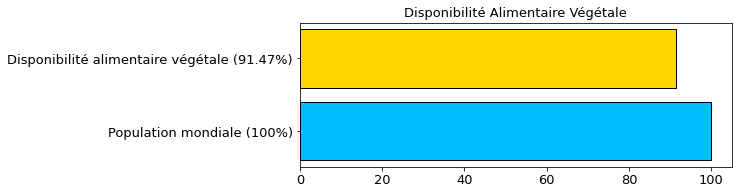

In [53]:
# Création du graphique

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,1,0.5])
population_x = ['Population mondiale (100%)','Disponibilité alimentaire végétale (91.47%)']
chiffres_y = [100,91.47]
plt.barh(population_x,chiffres_y,color = ('deepskyblue','gold'),edgecolor='black')
plt.yticks(fontsize=13, color='black')
plt.xticks(fontsize=13, color='black')
plt.title('Disponibilité Alimentaire Végétale', fontsize= 13)

### L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. <a class="anchor" id="section_1_4"></a>

Le calcul des proportions se fait en suivant cette formule :

**Disponibilité Intérieure = Nourriture + Aliments pour animaux + Semences + Pertes + Traitement + Autres Utilisations = (Production + Importations - Quantité + Variation de stock) - Exportations**	

Pour cela je dois :

* Importer les fichiers 'population.csv' et 'dispo_alimentaire.csv'
* Trier mes colonnes 
* Remplacer les valeurs NaN par "0"
* Faire une jointure entre les deux fichiers sur la colonne 'Zone'
* Appliquer ma formule

In [54]:
# Ouverture des fichiers
ma4_dispo = pd.read_csv('dispo_alimentaire.csv')
ma4_popu = pd.read_csv('population.csv')

In [55]:
# Création de ma dataframe avec seulement les colonnes qui me seront utiles
ma4_dispo = ma4_dispo[['Zone','Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']]

In [56]:
# Regroupement de mes données par rapport à la colonne 'Zone' et utilisation de la fonction d'agrégation 'sum'(somme)
ma4_dispo = ma4_dispo.groupby('Zone').sum()

In [57]:
# Remplacement des valeurs nan par 0
ma4_dispo.fillna(0, inplace=True)

In [58]:
# Jointure par la droite des dataframes avec comme clé la colonne 'Zone'
ma4_dispo = pd.merge(ma4_dispo,ma4_popu, on='Zone', how='left')

In [59]:
# Calcul de la proportion de disponibilité alimentaire pour les animaux
ma4_prop_aliment_animaux = ma4_dispo['Aliments pour animaux'].sum()/ma4_dispo['Disponibilité intérieure'].sum()*100

In [60]:
print("La proportion pour l'alimentation animale est de : {:,.2f} %".format(ma4_prop_aliment_animaux).replace(',', ' '))

La proportion pour l'alimentation animale est de : 13.23 %


In [61]:
# Calcul de la proportion de disponibilité alimentaire perdue
ma4_prop_pertes = ma4_dispo['Pertes'].sum()/ma4_dispo['Disponibilité intérieure'].sum()*100

In [62]:
print("La proportion des pertes est de : {:,.2f} %".format(ma4_prop_pertes).replace(',', ' '))

La proportion des pertes est de : 4.64 %


In [63]:
# Calcul de la proportion de disponibilité alimentaire pour l'alimentation humaine
ma4_prop_aliment_humain = ma4_dispo['Nourriture'].sum()/ma4_dispo['Disponibilité intérieure'].sum()*100

In [64]:
print("La proportion pour l'alimentation humaine est de : {:,.2f} %".format(ma4_prop_aliment_humain).replace(',', ' '))

La proportion pour l'alimentation humaine est de : 49.39 %


Text(0.5, 1.0, 'Répartition de la disponibilité intérieure')

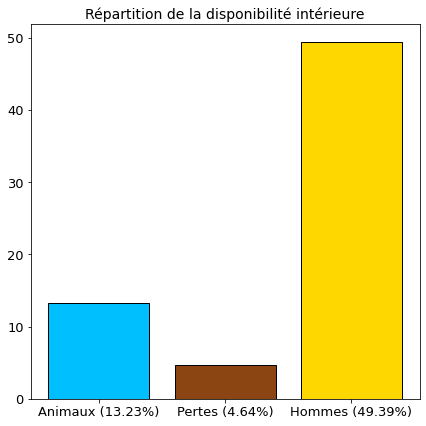

In [65]:
# Création du graphique

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0.8,0.6,0.9,1.3])
population_x = ['Animaux (13.23%)','Pertes (4.64%)','Hommes (49.39%)']
chiffres_y = [13.23,4.64,49.39]
plt.bar(population_x,chiffres_y,color = ('deepskyblue','saddlebrown','gold'),edgecolor='black')
plt.yticks(fontsize=13, color='black')
plt.xticks(fontsize=13, color='black')
plt.title('Répartition de la disponibilité intérieure', fontsize= 14)

## Requêtes de Mélanie <a class="anchor" id="chapter2"></a>

### Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 <a class="anchor" id="section_2_1"></a>

Pour cela je dois :

* Importer les fichiers 'population.csv' et 'sous_nutrition.csv'
* Remplacer les valeurs NaN et alphanumérique par "0" 
* Modifier le type de ma colonne 'Valeur' en numérique
* Faire une jointure entre les deux fichiers sur la colonne 'Zone'
* Selectionner les données de l'année 2017 ('2016-2018')
* Renommer les colonnes pour plus de lisibilité
* Créer une nouvelle colonne ('Proportion')
* Classer les données en ordre décroissant avec la colonne 'Proportion'

In [66]:
# Ouverture des fichiers
me1_population = pd.read_csv('population.csv')
me1_sous_nutrition = pd.read_csv('sous_nutrition.csv')

In [67]:
me1_sous_nutrition['Valeur'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [68]:
# Remplacement des valeurs '<0.1' par 0
me1_sous_nutrition.loc[me1_sous_nutrition['Valeur']=='<0.1']=0

In [69]:
# Remplacement des valeurs nan par 0
me1_sous_nutrition.fillna(0, inplace=True)

In [70]:
# Changement de type de la colonne 'Valeur' de object à float64 pour faire mes calculs
me1_sous_nutrition['Valeur'] = me1_sous_nutrition['Valeur'].apply(pd.to_numeric)

In [71]:
# Jointure de mes dataframes avec comme clé la colonne 'Zone' avec une restriction sur les deux colonnes 'Année' 
me1_sous_nutrition = pd.merge(me1_sous_nutrition.loc[me1_sous_nutrition['Année']=='2016-2018',['Valeur', 'Zone']],
                             me1_population.loc[me1_population['Année']==2017,['Année','Valeur','Zone']], on='Zone')


In [72]:
# Aperçu de la nouvelle dataframe
me1_sous_nutrition.head()

,Valeur_x,Zone,Année,Valeur_y
0,10.5,Afghanistan,2017,36296.113
1,3.1,Afrique du Sud,2017,57009.756
2,0.1,Albanie,2017,2884.169
3,1.3,Algérie,2017,41389.189
4,0.0,Allemagne,2017,82658.409


In [73]:
# Je renomme les colonnes 'Valeur' pour plus de lisibilité
me1_sous_nutrition.rename(columns={'Valeur_x':'Pers_sous_nutrition', 'Valeur_y':'Nombre_population'}, inplace= True)

In [74]:
# Mise à l'échelle de la colonne 'nombre population'
me1_sous_nutrition['Nombre_population'] = (me1_sous_nutrition['Nombre_population'])*1000

In [75]:
# Mise à l'échelle de la colonne 'pers sous nutrition'
me1_sous_nutrition['Pers_sous_nutrition'] = (me1_sous_nutrition['Pers_sous_nutrition'])*1000000

In [76]:
# Création d'une nouvelle colonne 'proportion' dans la dataframe
me1_sous_nutrition['Proportion'] = me1_sous_nutrition['Pers_sous_nutrition']/me1_sous_nutrition['Nombre_population']*100

In [77]:
# Je tri mes données par rapport à ma colonne 'proportion' et je choisi l'affichage par ordre décroissant
me1_sous_nutrition = me1_sous_nutrition.sort_values(by = 'Proportion', ascending = False) 

In [78]:
# Affichage des 10 premiers résultats
me1_sous_nutrition.head(10)

,Pers_sous_nutrition,Zone,Année,Nombre_population,Proportion
69,5300000.0,Haïti,2017,10982366.0,48.259182
142,12000000.0,République populaire démocratique de Corée,2017,25429825.0,47.188685
96,10500000.0,Madagascar,2017,25570512.0,41.062924
92,1800000.0,Libéria,2017,4702226.0,38.279742
89,800000.0,Lesotho,2017,2091534.0,38.249438
165,5700000.0,Tchad,2017,15016753.0,37.957606
146,4200000.0,Rwanda,2017,11980961.0,35.055619
108,9400000.0,Mozambique,2017,28649018.0,32.810898
168,400000.0,Timor-Leste,2017,1243258.0,32.173531
0,10500000.0,Afghanistan,2017,36296113.0,28.928718


### Les pays qui ont le plus bénéficié d’aide depuis 2013 <a class="anchor" id="section_2_2"></a>

Pour cela je dois :

* Importer le fichier 'aide_alimentaire.csv'
* Regrouper les données par pays
* Créer une nouvelle colonne 'Proportion'
* Renommer mes colonnes pour plus de lisibilité
* Classer les données en ordre décroissant avec la colonne 'Proportion'

In [79]:
# Ouverture du fichier
me2_aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

In [80]:
# Aperçu de la dataframe
me2_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [81]:
# Regroupement des données en fonction de la colonne 'Pays bénéficiaire' et utilisation de la fonction d'agrégation 'sum'(somme)
me2_aide_alimentaire = me2_aide_alimentaire.groupby('Pays bénéficiaire').sum()

In [82]:
# Création de la colonne 'proportion'
me2_aide_alimentaire['Proportion (%)']= (me2_aide_alimentaire['Valeur']/me2_aide_alimentaire['Valeur'].sum()*100)

In [83]:
# Tri des données en fonction de la colonne 'proportion (%)' et affichage par ordre décroissant
me2_aide_alimentaire = me2_aide_alimentaire.sort_values(by = 'Proportion (%)', ascending = False) 

In [84]:
# Suppression de la colonne 'Année'
del me2_aide_alimentaire['Année']

In [85]:
# Renommage de ma colonne 'Valeur'
me2_aide_alimentaire = me2_aide_alimentaire.rename(columns={'Valeur':'Valeur (Tonnes)'})

In [86]:
# Affichage des 10 premiers résultats
me2_aide_alimentaire.head(10)

,Valeur (Tonnes),Proportion (%)
Pays bénéficiaire,,
République arabe syrienne,1858943,16.844506
Éthiopie,1381294,12.516368
Yémen,1206484,10.932356
Soudan du Sud,695248,6.299875
Soudan,669784,6.069137
Kenya,552836,5.009432
Bangladesh,348188,3.155048
Somalie,292678,2.652054
République démocratique du Congo,288502,2.614213


In [87]:
me2_aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, République arabe syrienne to Bolivie (État plurinational de)
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Valeur (Tonnes)  76 non-null     int64  
 1   Proportion (%)   76 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.8+ KB


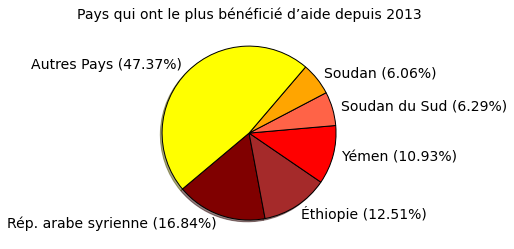

In [88]:
# Création du graphique

# Importation du module pyplot de la librairie matplotlib
import matplotlib.pyplot as plt 

# création d'une liste comme arguments pour le graphique
proportion_pays = [16.84,12.51,10.93,6.29,6.06, 47.37] 
# Paramétrage du graphique
plt.pie(proportion_pays,labels=['Rép. arabe syrienne (16.84%)', 'Éthiopie (12.51%)','Yémen (10.93%)','Soudan du Sud (6.29%)','Soudan (6.06%)', 'Autres Pays (47.37%)'],colors = ['maroon','brown','red','tomato','orange','yellow'],pctdistance=0.6,shadow=True, startangle=220,wedgeprops={'linewidth': 1.0,'edgecolor':'black'},textprops={'fontsize': 14})
# Ajout du titre
plt.title("Pays qui ont le plus bénéficié d’aide depuis 2013", fontsize= 14 )
# Affichage
plt.show()

### Les pays ayant le plus/le moins de disponibilité/habitant <a class="anchor" id="section_2_3"></a>

Pour cela je dois :

* Importer le fichier 'dispo_alimentaire.csv' et 'population.csv'
* Faire une jointure entre mes deux fichiers
* Regrouper les données par pays
* Classer les données selon la colonne 'Disponibilité alimentaire (Kcal/personne/jour)' et la colonne 'Nombre d'habitants'


In [89]:
# Ouverture du fichier
me3_dispo = pd.read_csv('dispo_alimentaire.csv')
me3_popu = pd.read_csv('population.csv')

In [90]:
# Aperçu de la dataframe
me3_dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [91]:
me3_dispo = me3_dispo[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]

In [92]:
me3_popu = me3_popu.loc[me3_popu['Année']==2017,:]

In [93]:
me3_dispo = me3_dispo.groupby('Zone').sum()

In [94]:
me3_dispo.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0


In [95]:
del me3_popu['Année']

In [96]:
me3_popu.head()

,Zone,Valeur
4,Afghanistan,36296.113
10,Afrique du Sud,57009.756
16,Albanie,2884.169
22,Algérie,41389.189
28,Allemagne,82658.409


In [97]:
me3_popu['Valeur'] = me3_popu['Valeur']*1000

In [98]:
me3_dispo = pd.merge(me3_popu,me3_dispo, on='Zone')

In [99]:
me3_dispo.head(15)

,Zone,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113.0,2087.0
1,Afrique du Sud,57009756.0,3020.0
2,Albanie,2884169.0,3188.0
3,Algérie,41389189.0,3293.0
4,Allemagne,82658409.0,3503.0
5,Angola,29816766.0,2474.0
6,Antigua-et-Barbuda,95426.0,2416.0
7,Arabie saoudite,33101179.0,3255.0
8,Argentine,43937140.0,3226.0
9,Arménie,2944791.0,2924.0


In [100]:
# Création d'une dataframe qui affiche les pays avec le plus de disponibilité alimentaire
me3_pays_dispo_plus = me3_dispo.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)','Valeur'], ascending = False) 

In [101]:
# Affichage des 10 premiers résultats
me3_pays_dispo_plus.head(10)

,Zone,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,8819901.0,3770.0
17,Belgique,11419748.0,3737.0
163,Turquie,81116450.0,3708.0
54,États-Unis d'Amérique,325084756.0,3682.0
80,Israël,8243848.0,3610.0
78,Irlande,4753279.0,3602.0
81,Italie,60673701.0,3578.0
95,Luxembourg,591910.0,3540.0
47,Égypte,96442591.0,3518.0
4,Allemagne,82658409.0,3503.0


In [102]:
# Création d'une dataframe qui affiche les pays avec le moins de disponibilité alimentaire
me3_pays_dispo_moins = me3_dispo.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)','Valeur'], ascending = True) 

In [103]:
# Affichage des 10 premires résultats
me3_pays_dispo_moins.head(10)

,Zone,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
131,République centrafricaine,4596023.0,1879.0
170,Zambie,16853599.0,1924.0
97,Madagascar,25570512.0,2056.0
0,Afghanistan,36296113.0,2087.0
70,Haïti,10982366.0,2089.0
136,République populaire démocratique de Corée,25429825.0,2093.0
156,Tchad,15016753.0,2109.0
171,Zimbabwe,14236595.0,2113.0
120,Ouganda,41166588.0,2126.0
158,Timor-Leste,1243258.0,2129.0


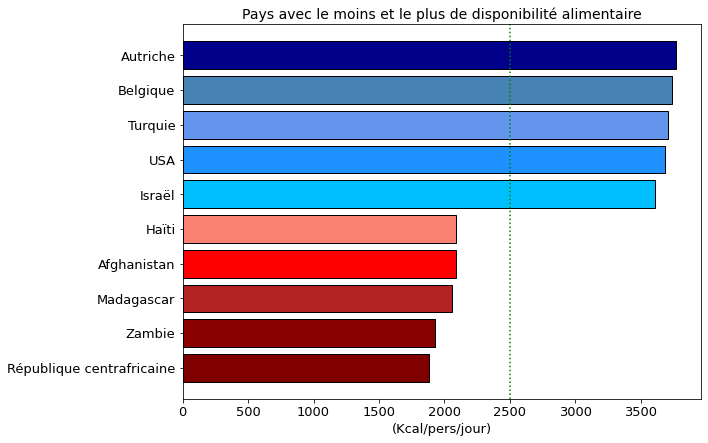

In [104]:
# Création du graphique de comparaison entre les deux dataframes

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0.8,0.6,1.2,1.3])
population_x = ['République centrafricaine','Zambie','Madagascar','Afghanistan','Haïti','Israël','USA','Turquie','Belgique','Autriche']
chiffres_y = [1879,1924,2056,2087,2089,3610,3682,3708,3737,3770]
plt.barh(population_x,chiffres_y,color = ('maroon','darkred','firebrick','red','salmon','deepskyblue','dodgerblue','cornflowerblue','steelblue','darkblue'),edgecolor='black')
plt.yticks(fontsize=13, color='black')
plt.xticks(fontsize=13, color='black')
plt.title("Pays avec le moins et le plus de disponibilité alimentaire", fontsize=14)
# Ajout d'un titre sur l'axe x
plt.xlabel("(Kcal/pers/jour)", fontsize=13)
plt.axvline(2500,color='green',linestyle=':')


## Pistes supplémentaires de recherches <a class="anchor" id="chapter3"></a>

### Répartition des céréales entre l'alimentation humaine et animale <a class="anchor" id="section_3_1"></a>

Dans le fichier rédigé par Julien, il indique avoir trouvé des chiffres intéressants sur l'utilisation des céréales et principalement sur la répartion entre l'alimentation pour les hommes et celles pour les animaux. 
Pour cela je dois : 
* Aller sur le site de la FAO afin de pouvoir extraire la liste des céréales et filtrer mon fichier 'dispo_alimentaire.csv'
* Filtrer mes données.
* Calculer la proportion de céréales destinée pour la nourriture des hommes et celle pour les animaux.

In [105]:
# Ouverture du fichier téléchargé sur FAO
cereales_dispo = pd.read_csv('cereales-2017.csv')

In [106]:
# Ouverture du fichier dispo_alimentaire
cereale = pd.read_csv('dispo_alimentaire.csv')

In [107]:
# Affichage de toutes les valeurs unique de la colonne 'Produit'
cereale['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [108]:
cereales_dispo.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Nouveaux Bilans Alimentaire,Afghanistan,Production,Blé et produits,2017,4281.0
1,Nouveaux Bilans Alimentaire,Afghanistan,Importations - Quantité,Blé et produits,2017,3080.0
2,Nouveaux Bilans Alimentaire,Afghanistan,Variation de stock,Blé et produits,2017,32.0
3,Nouveaux Bilans Alimentaire,Afghanistan,Exportations - Quantité,Blé et produits,2017,2.0
4,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité intérieure,Blé et produits,2017,7326.0


In [109]:
# Affichage de toutes les valeurs uniques de la colonne 'Produit'
cereales_dispo['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres'],
      dtype=object)

Comme on peut le remarquer, les deux listes ne sont pas identiques:   
Dans le fichier *'cereales-2017.csv'*, le blé est appelé : **'Blé et produits'** alors que dans le fichier *'dispo_alimentaire.csv'*, il est est appelé : **'Blé'**.  

Si j'applique la liste telle quelle, ma dataframe ne conservera que les éléments identiques dans les deux listes à savoir : **'Avoine'** et **'Céréales, Autres'** et cela faussera les résultats en indiquant comme valeurs 69% pour la nourriture animal et 17% comme nourriture pour les hommes.  
C'est pour cela que je décide de garder le fichier *'cereales-2017.csv'*

In [110]:
# Création d'une nouvelle dataframe avec les colonnes qui me sont utiles
cereales_dispo = cereales_dispo[['Zone','Élément','Produit','Valeur']]
cereales_dispo.head()


,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,3080.0
2,Afghanistan,Variation de stock,Blé et produits,32.0
3,Afghanistan,Exportations - Quantité,Blé et produits,2.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,7326.0


In [111]:
cereales_dispo = pd.pivot(cereales_dispo, index=['Zone','Produit'], columns=['Élément'],values=['Valeur'])

In [112]:
cereales_dispo.head()

Valeur  \
Élément                        Aliments pour animaux   
Zone        Produit                                    
Afghanistan Avoine                               0.0   
            Blé et produits                    491.0   
            Céréales, Autres                     0.0   
            Maïs et produits                   111.0   
            Millet et produits                   0.0   

                                                                      \
Élément                        Autres utilisations (non alimentaire)   
Zone        Produit                                                    
Afghanistan Avoine                                               NaN   
            Blé et produits                                      NaN   
            Céréales, Autres                                     NaN   
            Maïs et produits                                     NaN   
            Millet et produits                                   NaN   

                                                                               \
Élément                        Disponibilité alimentaire (Kcal/personne/jour)   
Zone        Produit                                                             
Afghanistan Avoine                                                        0.0   
            Blé et produits                                            1358.0   
            Céréales, Autres                                              0.0   
            Maïs et produits                                             11.0   
            Millet et produits                                            3.0   

                                                                                       \
Élément                        Disponibilité alimentaire en quantité (kg/personne/an)   
Zone        Produit                                                                     
Afghanistan Avoine                                                           0.00       
            Blé et produits                                                158.38       
            Céréales, Autres                                                 0.00       
            Maïs et produits                                                 1.34       
            Millet et produits                                               0.32       

                                                                                              \
Élément                        Disponibilité de matière grasse en quantité (g/personne/jour)   
Zone        Produit                                                                            
Afghanistan Avoine                                                           0.00              
            Blé et produits                                                  4.93              
            Céréales, Autres                                                 0.00              
            Maïs et produits                                                 0.16              
            Millet et produits                                               0.02              

                                                                                         \
Élément                        Disponibilité de protéines en quantité (g/personne/jour)   
Zone        Produit                                                                       
Afghanistan Avoine                                                           0.00         
            Blé et produits                                                 36.53         
            Céréales, Autres                                                 0.00         
            Maïs et produits                                                 0.30         
            Millet et produits                                               0.06         

                                                         \
Élément                        Disponibilité intérieure   
Zone        Produit                       

In [113]:
cereales_dispo.index.names

FrozenList(['Zone', 'Produit'])

In [114]:
#cereales_dispo = cereales_dispo.rename(columns={('Valeur','Aliments pour animaux'): 'Animaux', ('Valeur','Nourriture'): 'Nourriture'})

In [115]:
# Calcul de la proportion de céréales destinée aux Hommes et celle pour les animaux
dispo_homme = cereales_dispo[('Valeur','Nourriture')].sum()/cereales_dispo[('Valeur','Disponibilité intérieure')].sum()*100
dispo_animaux = cereales_dispo[('Valeur','Aliments pour animaux')].sum()/cereales_dispo[('Valeur','Disponibilité intérieure')].sum()*100

In [116]:
print("La proportion de céréales destinée l'alimentation humaine est de : {:,.2f} %".format(dispo_homme).replace(',', ' '))
print("La proportion de céréales destinée aux animaux est de : {:,.2f} %".format(dispo_animaux).replace(',', ' '))

La proportion de céréales destinée l'alimentation humaine est de : 45.20 %
La proportion de céréales destinée aux animaux est de : 33.18 %


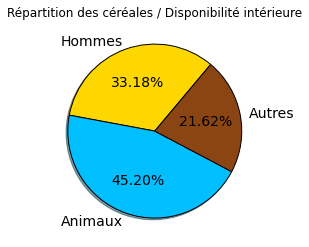

In [117]:
# Création du graphique

# Importation du module pyplot de la librairie matplotlib
import matplotlib.pyplot as plt 

# création d'une liste comme arguments pour le graphique
parts = [33.18, 45.20,21.62] 
# Paramétrage du graphique
plt.pie(parts,labels=['Hommes', 'Animaux','Autres'],colors = ['gold','deepskyblue','saddlebrown'],autopct='%.2f%%',pctdistance=0.6,shadow=True, startangle=50,wedgeprops={'linewidth': 1.0,'edgecolor':'black'},textprops={'fontsize': 14})
# Ajout du titre
plt.title("Répartition des céréales / Disponibilité intérieure" )
# Affichage
plt.show()

### Comparaison de la répartition des céréales entre l'alimentation humaine et animale en fonction des pays ayant le plus de disponibilité alimentaire et ceux qui en ont le moins <a class="anchor" id="section_3_2"></a>

Mélanie m'a demandé de faire la liste des pays ayant le moins et le plus de disponibilité alimentaire. Je trouve intéressant de reprendre cette liste afin de pouvoir comparer l'utilisation et la consommation des céréales entre ces deux groupes.  
Pour cette nouvelle recherche, je reprends le fichier *'cereales.csv'* que j'ai téléchargé sur FAO car il contient la colonne **'Valeur'** qui me permettra de calculer les proportions.

In [118]:
# Ouverture du fichier téléchargé sur FAO
cereales = pd.read_csv('cereales-2017.csv')

In [119]:
# Création d'une liste de 5 pays ayant le moins de disponibilité alimentaire
pays_moins = ('Afghanistan','République centrafricaine','Zambie','Madagascar','Haïti')

In [120]:
# Création d'une liste de 5 pays ayant le plus de disponibilité alimentaire
pays_plus = ('Autriche','Belgique','Turquie',"États-Unis d'Amérique",'Israël')

In [121]:
# Sélection des colonnes qui me sont utiles
cereales = cereales[['Zone','Élément','Produit','Valeur']]

In [122]:
# Aperçu de la dataframe
cereales.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,3080.0
2,Afghanistan,Variation de stock,Blé et produits,32.0
3,Afghanistan,Exportations - Quantité,Blé et produits,2.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,7326.0


In [123]:
# Création d'une dataframe en prenant comme restriction la liste pays_moins
df_moins = cereales.loc[cereales['Zone'].isin(pays_moins),:]

In [124]:
# Création d'une dataframe en prenant comme restriction la liste pays_plus
df_plus = cereales.loc[cereales['Zone'].isin(pays_plus),:]

In [125]:
df_moins.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,3080.0
2,Afghanistan,Variation de stock,Blé et produits,32.0
3,Afghanistan,Exportations - Quantité,Blé et produits,2.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,7326.0


In [126]:
df_plus.head()

,Zone,Élément,Produit,Valeur
1117,Autriche,Production,Blé et produits,1437.0
1118,Autriche,Importations - Quantité,Blé et produits,1479.0
1119,Autriche,Variation de stock,Blé et produits,134.0
1120,Autriche,Exportations - Quantité,Blé et produits,1185.0
1121,Autriche,Disponibilité intérieure,Blé et produits,1598.0


In [127]:
# Création d'une table pivot en prenant comme index la colonne 'Produit', affiche les données de la colonne 'Élément' 
# et prend 'Valeur' comme colonne à agréger 
df_moins = pd.pivot_table(df_moins, index=['Produit'], columns=['Élément'],values=['Valeur'])

In [128]:
df_moins.head()

Valeur  \
Élément            Aliments pour animaux   
Produit                                    
Avoine                          0.000000   
Blé et produits               123.000000   
Céréales, Autres                0.000000   
Maïs et produits              110.400000   
Millet et produits              0.666667   

                                                          \
Élément            Autres utilisations (non alimentaire)   
Produit                                                    
Avoine                                               NaN   
Blé et produits                                10.666667   
Céréales, Autres                                     NaN   
Maïs et produits                               11.666667   
Millet et produits                                   NaN   

                                                                   \
Élément            Disponibilité alimentaire (Kcal/personne/jour)   
Produit                                                             
Avoine                                                        0.0   
Blé et produits                                             362.2   
Céréales, Autres                                              1.0   
Maïs et produits                                            302.4   
Millet et produits                                            6.5   

                                                                           \
Élément            Disponibilité alimentaire en quantité (kg/personne/an)   
Produit                                                                     
Avoine                                                          0.006       
Blé et produits                                                42.898       
Céréales, Autres                                                0.074       
Maïs et produits                                               35.152       
Millet et produits                                              0.725       

                                                                                  \
Élément            Disponibilité de matière grasse en quantité (g/personne/jour)   
Produit                                                                            
Avoine                                                          0.000              
Blé et produits                                                 1.338              
Céréales, Autres                                                0.002              
Maïs et produits                                                3.478              
Millet et produits                                              0.065              

                                                                             \
Élément            Disponibilité de protéines en quantité (g/personne/jour)   
Produit                                                                       
Avoine                                                         0.0020         
Blé et produits                                               10.0520         
Céréales, Autres                                               0.0280         
Maïs et produits                                               7.9520         
Millet et produits                                             0.1725         

                                                                     \
Élément            Disponibilité intérieure Exportations - Quantité   
Produit                                                               
Avoine                                  0.2                0.000000   
Blé et produits                      1645.4                3.000000   
Céréales, Autres                        1.2                0.333333   
Maïs et produits                      723.2               88.500000   
Millet et produits                     11.0                0.000000   

                                                                              \
Élément            Importations - Quantité Nourriture      Pertes Productio

In [129]:
# Création d'une table pivot en prenant comme index la colonne 'Produit', affiche les données de la colonne 'Élément' 
# et prend 'Valeur' comme colonne à agréger 
df_plus = pd.pivot_table(df_plus, index=['Produit'], columns=['Élément'],values=['Valeur'])

In [130]:
# Affichage du nom des colonnes en multi index
df_moins.columns

MultiIndex([('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...),
            ('Valeur', ...)],
           names=[None, 'Élément'])

In [131]:
# Renommage des colonnes pour plus de lisibilité
df_moins = df_moins.rename(columns={('Valeur','Aliments pour animaux'): 'Animaux', ('Valeur','Nourriture'): 'Hommes'})

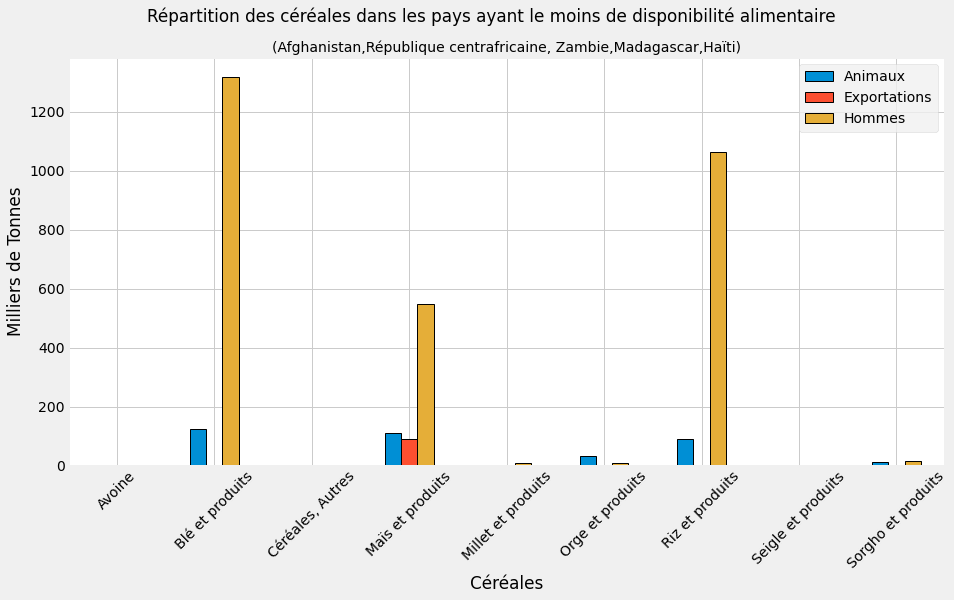

In [132]:
# Création d'un graphique qui va afficher la répartition des différentes céréales entre les animaux, l'exportation et 
# les hommes dans les pays qui ont le moins de disponibilité alimentaire
import matplotlib
# Utilisation d'un style prédéfini pour le graphique
matplotlib.style.use('fivethirtyeight') 
ax = df_moins[[('Valeur','Aliments pour animaux'),('Valeur','Exportations - Quantité'),('Valeur','Nourriture')]].plot(kind="bar", edgecolor='black',linewidth=1)
fig = ax.get_figure()
fig.set_size_inches(14,7)
ax.set_xlabel("Céréales")
ax.set_ylabel("Milliers de Tonnes")
plt.xticks(rotation=45)
ax.set_facecolor('white')
plt.suptitle('Répartition des céréales dans les pays ayant le moins de disponibilité alimentaire', size = 'large')
plt.title('(Afghanistan,République centrafricaine, Zambie,Madagascar,Haïti)', size = 'medium')
plt.legend(['Animaux','Exportations','Hommes'])



In [133]:
# Renommage des colonnes pour plus de lisibilité
df_plus = df_plus.rename(columns={('Valeur','Aliments pour animaux'): 'Animaux', ('Valeur','Nourriture'): 'Hommes'})

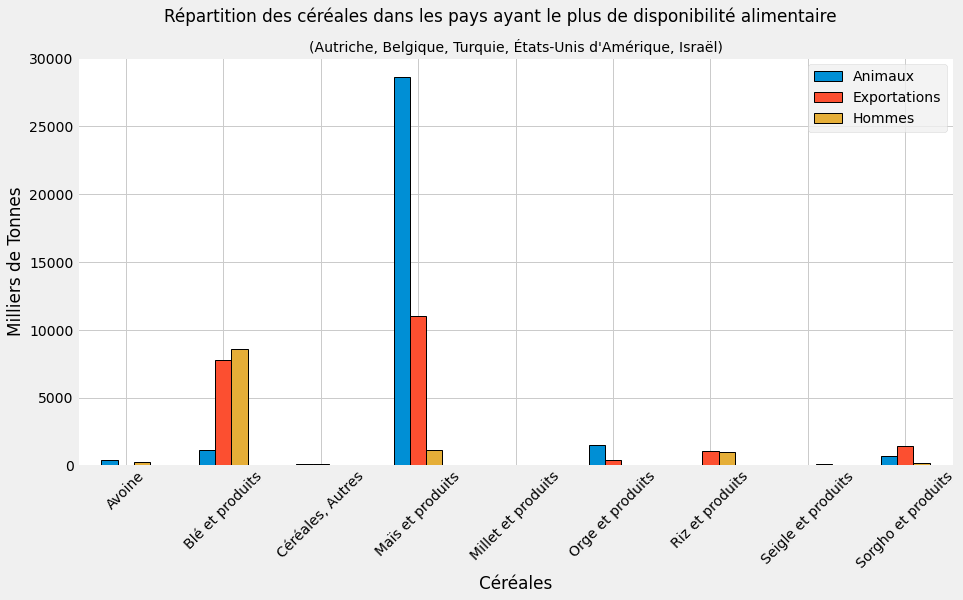

In [134]:
# Création d'un graphique qui va afficher la répartition des différentes céréales entre les animaux, l'exportation et 
# les hommes dans les pays qui ont le plus de disponibilité alimentaire
import matplotlib
matplotlib.style.use('fivethirtyeight') 
# J'indique les colonnes que je veux afficher dans mon graphique à barres en précisant qu'elles doivent être empilées (stacked)
ax = df_plus[[('Valeur','Aliments pour animaux'),('Valeur','Exportations - Quantité'),('Valeur','Nourriture')]].plot(kind="bar", edgecolor='black',linewidth=1)
fig = ax.get_figure()
fig.set_size_inches(14,7)
ax.set_xlabel("Céréales")
ax.set_ylabel("Milliers de Tonnes")
plt.xticks(rotation=45)
ax.set_facecolor('white')
plt.suptitle('Répartition des céréales dans les pays ayant le plus de disponibilité alimentaire', size = 'large')
plt.title("(Autriche, Belgique, Turquie, États-Unis d'Amérique, Israël)", size = 'medium')
plt.legend(['Animaux','Exportations','Hommes'])



### La Thaïlande et l'utilisation du manioc <a class="anchor" id="section_3_3"></a>

Julien parle de l'utilisation du Manioc en Thaïlande malgré un taux de sous-nutrition élevé.
Pour approfondir cet axe de recherche, je vais calculer la proportion d'utilisation du manioc pour les hommes, les animaux et pour l'exportation.  

Je vais calculer par la suite la proportion de sous-nutrition pour la comparer aux précédents résultats.  

Pour cela je dois :
* Ouvrir le fichier **'dispo_alimentaire.csv'**
* Filtrer les colonnes 'Zone' et 'Produit' pour ne conserver que la Thaïlande et le manioc
* Je calcule mes proportions
* J'ouvre mon fichier 'population.csv' afin de calculer le pourcentage de personnes en sous-nutrition
* Je fais une restriction dans la colonne 'Zone' pour la Thaïlande et dans la colonne 'Année' pour l'année 2017
* J'ouvre le fichier 'sous_nutrition.csv" afin de faire une jointure sur la dataframe obtenue avec le fichier 'population.csv'
* Je renomme mes colonnes pour plus de lisibilité
* Je calcule la proportion de personne en état de sous-nutrition en Thaïlande en 2017




In [135]:
manioc = pd.read_csv('dispo_alimentaire.csv')

In [136]:
manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [137]:
# J'applique mes deux restrictions sur mes colonnes 'Zone' et 'Produit'
manioc = manioc.loc[(manioc['Zone']=='Thaïlande')& (manioc['Produit']=='Manioc'),:]

In [138]:
manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [139]:
# Calcul de la proportion de manioc pour les hommes
manioc_dispo_homme = manioc['Nourriture']/manioc['Disponibilité intérieure']*100

In [140]:
# Calcul de la proportion de manioc pour les animaux
manioc_dispo_animaux = manioc['Aliments pour animaux']/manioc['Disponibilité intérieure']*100

In [141]:
# Calcul de la proportion de manioc pour l'exportation
manioc_exportation = manioc['Exportations - Quantité']/(manioc['Production']+manioc['Importations - Quantité']+manioc['Variation de stock'])*100

In [142]:
print(manioc_dispo_homme)
print(manioc_dispo_animaux)
print(manioc_exportation)

13809    13.904853
dtype: float64
13809    28.735632
dtype: float64
13809    80.100388
dtype: float64


In [143]:
thai_population = pd.read_csv('population.csv')

In [144]:
# Restriction pour ne conserver que les données sur la Thaïlande en 2017
thai_population = thai_population.loc[(thai_population['Zone']=='Thaïlande') & (thai_population['Année']==2017),:]

In [145]:
thai_population.head()

,Zone,Année,Valeur
1312,Thaïlande,2017,69209.81


In [146]:
thai_sous_nutrition = pd.read_csv('sous_nutrition.csv')

In [147]:
# Jointure par la gauche des dataframes avec comme index la colonne 'Zone'
thai_population = pd.merge(thai_population,thai_sous_nutrition, on='Zone', how='left')

In [148]:
# Restriction sur la colonne 'Année_y'
thai_population = thai_population.loc[thai_population['Année_y']=='2016-2018',:]

In [149]:
thai_population.head()

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
4,Thaïlande,2017,69209.81,2016-2018,6.2


In [150]:
# Changement de type object à float64 de la colonne 'Valeur_y'
thai_population['Valeur_y']= thai_population['Valeur_y'].apply('float')

In [151]:
# Renommage des colonnes pour plus de lisibilité
thai_population.rename(columns= {'Valeur_x':'Personne sous-nutrition', 'Valeur_y': 'Population'}, inplace= True) 

In [152]:
# Mise à la même échelle des colonnes
thai_population['Population'] = thai_population['Population'].sum()*1000000
thai_population['Personne sous-nutrition'] = thai_population['Personne sous-nutrition'].sum()*1000

In [153]:
# Suppression de la colonne 'Année_y'
del thai_population['Année_y']

In [154]:
# Calcul de la proportion de sous-nutrition en Thaïlande
thai_proportion = (thai_population['Personne sous-nutrition'].sum()/thai_population['Population'])

In [155]:
print(thai_proportion)

4    11.162873
Name: Population, dtype: float64


Text(0.5, 0, 'Pourcentage (%)')

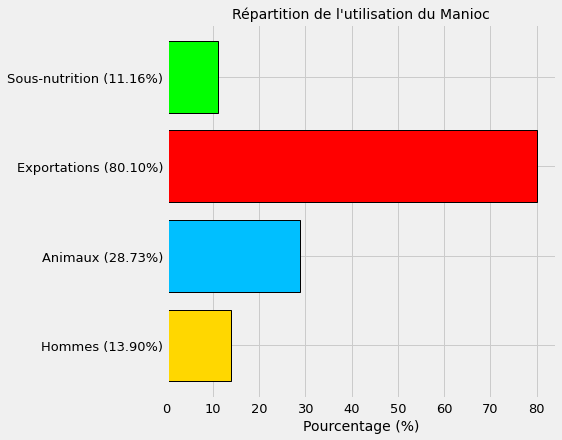

In [156]:
# Création du graphique de comparaison entre les deux dataframes

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0.8,0.6,0.9,1.3])
population_x = ['Hommes (13.90%)','Animaux (28.73%)','Exportations (80.10%)','Sous-nutrition (11.16%)']
chiffres_y = [13.90,28.73,80.10,11.16]
plt.barh(population_x,chiffres_y,color = ('gold','deepskyblue','red','lime'),edgecolor='black',linewidth=1)
plt.yticks(fontsize=13, color='black')
plt.xticks(fontsize=13, color='black')
plt.title("Répartition de l'utilisation du Manioc", fontsize=14)

# Ajout d'un titre sur l'axe x
plt.xlabel("Pourcentage (%)",fontsize=14)